# Tâche 8

Dans ce notebook, on cherche à calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin du cristal Ca2NCl.

## Extraction des informations

In [11]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors

In [12]:
mp_key = "laRpenx9s6Ae6IiAe8AHZRRyzI5fduqF"
mp_id = "mp-22936"

In [13]:
with MPRester(mp_key) as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Deux représentations graphiques

Plot de la structure des bandes de phonons du Ca2NCl

Ce premier plot ne s'affiche pas sur github mais m'a permis de connaitre le numéro des bandes 

In [14]:
fig_ph_bs = get_plot_bs(ph_bs)
fig_ph_bs.update_yaxes(rangemode="tozero")
fig_ph_bs.show()

Plot s'affichant sur github

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{Frequencies\\ (THz)}$'>

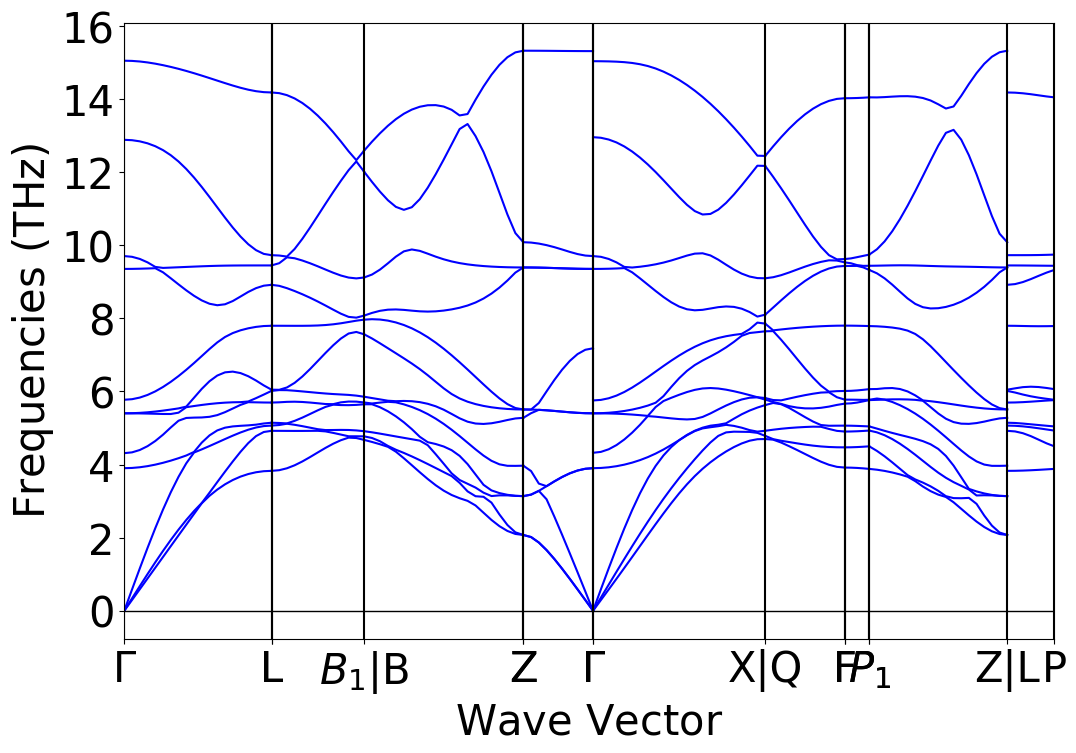

In [15]:
phplot = PhononBSPlotter(ph_bs)
phplot.get_plot()

Plot de la zone de Brillouin

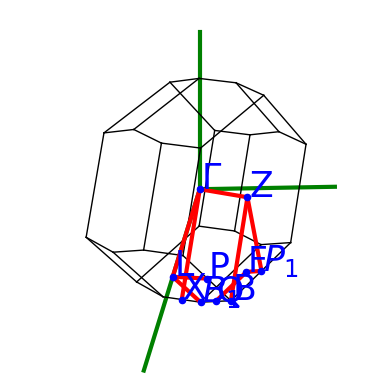

In [16]:
ph_plt = PhononBSPlotter(ph_bs)
ph_plt.plot_brillouin()

## Notions théoriques
Une branche est dite acoustique si les fréquences des vibrations des phonons sont proche de 0. On peut voir sur la structure des bandes de phonons que 3 branches (les branches 1, 2 et 3) passent par de valeurs de fréquences nulles correspondant au point $\Gamma$ sur l'axe des vecteurs d'onde. En s'aidant aussi de la zone de Brillouin, on peut voir très clairement 3 directions se profiler : $\Gamma$ - L , $\Gamma$ - Z, $\Gamma$ - X.  C'est dans ces trois directions qu'il sera calculé la vitesse du son On peut voir qu'il y a 3 bandes qui tendent vers zéro en $\Gamma$ : les bande 1,2 et 3. $\\\\$

La vitesse de propagation d'un phonon correspondant à la vitesse de propagation du son dans un solide peut s'écrire  $c = \frac{d\omega}{dq}$ lorsque $\omega$ tend vers 0. La fréquence étant reliée à $\omega$ par la relation $\omega = 2\pi f $, cela revient à dire que la relation est vrai quand la fréquence tend vers zéro. Cela tombe bien, 3 branches acoustiques ont été choisi avec 3 directions menant à une fréquence nulle. On peut observer que les branches adoptent un comportement linéaire quand la fréquence tend vers zéro, c'est pour cela qu'on peut écrire cette relation pour la vitesse. 

## Calcul des vitesses

In [17]:
# Pour appliquer la formule, il faut prendre les valeurs des fréquences et des distances 
frequency = PhononBSPlotter(ph_bs).bs_plot_data().get('frequency')
distances = PhononBSPlotter(ph_bs).bs_plot_data().get('distances')

### Vitesse du son  dans la première direction  $\Gamma$ vers L pour la branche 1

In [18]:
#1er = l'endroit des vecteurs d'onde ou on part 2em = le numéro de la bande 3eme égale valeur 
frequence_l = frequency[0][0][1]  # 1er valeur de la fréquence (et donc proche de 0) pour la branche 1 sur l'intervalle Gamma-L

frequence_gamma2 = frequency[0][0][0] # 2eme valeur de la fréquence (et donc proche de 0) pour la branche 1 sur l'intervalle Gamma-L

df1 = (frequence_l-frequence_gamma2)*1e12 # calcul de l'intervalle df + conversion THz en Hz

q_l = distances[0][1] #1er valeur de longueur dans l'intervalle gamma-L

q_gamma2 = distances[0][0] #2eme valeur de longueur dans l'intevalle gamma-L

dq1 = (q_l - q_gamma2)/1e-10 # calcule de l'intervalle dq + conversion des angström en mètre


pente1 = df1/dq1 

vitesse1 = 2*np.pi*np.abs(pente1) # on applique la formule 𝜔=2𝜋𝑓 

print("La vitesse du son dans la direction Γ vers L vaut en m/s :", vitesse1)

La vitesse du son dans la direction Γ vers L vaut en m/s : 3445.127680648329


### Vitesse du son  dans la deuxième direction Z vers $\Gamma$ pour la branche 2

In [19]:
frequence_z = frequency[3][1][-2] # avant dernière valeur de la fréquence(et donc proche de 0) pour la branche 2 dans l'intervalle Z-gamma
frequence_gamma2 = frequency[3][1][-1] #dernière valeur de la fréquence(et donc proche de 0) pour la branche 2 dans l'intervalle Z-gamma
df2 = (frequence_gamma2-frequence_z)*1e12


q_gamma2 = distances[3][-1] #dernière valeur de longueur dans l'intervalle gamma-L
q_z = distances[3][-2] #avant dernière valeur de longueur dans l'intervalle gamma-L
dq2 = (q_gamma2 - q_z)/1e-10


pente2 = df2/dq2

vitesse2 = 2*np.pi*np.abs(pente2)

print("La vitesse du son dans la direction Γ vers L vaut en m/s : ", vitesse2)

La vitesse du son dans la direction Γ vers L vaut en m/s :  3444.8718533805177


### Vitesse du son dans la  troisième direction  $\Gamma$ vers X pour la branche 3

In [20]:
frequence_x = frequency[4][2][1]
frequence_gamma3 = frequency[4][2][0]
df3 = (frequence_x-frequence_gamma3)*1e12



q_x = distances[4][1]
q_gamma3 = distances[4][0]
dq3 = (q_x - q_gamma3)/1e-10


pente3 = df3/dq3


vitesse3 = 2*np.pi*np.abs(pente3)

print("La vitesse du son dans la direction Γ vers L vaut en m/s : ", vitesse3)


La vitesse du son dans la direction Γ vers L vaut en m/s :  6773.133200607645


## Observation et conclusion

Même si les vitesses sont prises pour des branches différentes dans 3 directions différentes, on peut voir que la vitesse dans la troisième direction est plus grande que les vitesses dans les deux autres directions qui sont presque identiques. On peut bien voir que pour les branches 1 et 2 les pentes sont presques identiques quand la fréquence tend vers 0 et la branche 3 par contre a toujours une pente + élevée quand la fréquence tend vers 0. (Ce qui est toujours le cas pour les 3 branches dans les 3 directions si on regarde la structure dse bandes de phonons)